# Data Science Group Group Project Proposal 006-021
#### Members: 
- Jaden Lai (79465795)
- Percy Pham (70210562)
- Sydney Trim (86059649)

## Title: Heart Disease Data:
### Introduction:
Heart disease is a leading cause of death worldwide that is influenced by many variables including age, sex, blood pressure, diet, and many more. This project aims to identify patients most likely to experience heart problems (chest pain, heart disease) and the associations between them by analyzing age, sex, resting blood pressure, resting electrocardiographic results, and fasting blood sugar. To answer this question we will be analyzing and manipulating the Heat Disease Data Set from the Hungarian Institute of Cardiology. This dataset includes fourteen attributes. However, we have selected eight of them to use in our analysis as we seek an answer to our question.

Question: Patient’s most likely to experience heart problems (chest pain, exercise induced angina, thalassemia, heart disease) using predictors, age, sex, resting blood pressure, resting electrocardiographic results, fasting blood sugar


In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Preliminary exploratory data analysis

##### Downloading the data, cleaning the table

In [146]:
# Downloading the data, cleaning the table
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", "data/project_.csv")
heart_disease_hungarian <- read_csv("data/project_.csv", col_names = FALSE)
colnames(heart_disease_hungarian) <- c("age", "sex", "chest_pain", "resting_blood_pressure", "cholesterol",
                                       "fasting_blood_sugar", "resting_electrocardiographic_results", "maximum_heart_rate_achieved", 
                                       "exercise_induced_angina", "ST_depression",
                                       "slope_of_peak_exercise_ST_segment",
                                       "number_of_major_vessels", "thalassemia", "heart_disease_cases") 

heart_disease_hungarian <- heart_disease_hungarian |>
            select(age, sex, chest_pain, resting_blood_pressure, fasting_blood_sugar,
                   resting_electrocardiographic_results, heart_disease_cases) |> 
            mutate(sex = recode(sex, "1" = "Male", "0" = "Female")) |>
            mutate(chest_pain = recode(chest_pain, "1" = "Typical angina",
                                       "2" = "ATypical angina",
                                       "3" = "Non-angina pain",
                                       "4" = "Asymptomatic")) |>
            mutate(resting_blood_pressure = as.numeric(resting_blood_pressure)) |>
            mutate(fasting_blood_sugar = recode(fasting_blood_sugar, "1" = "> 120",
                                       "0" = "<= 120")) |>
            mutate(resting_electrocardiographic_results = recode(chest_pain, "0" = "Normal",
                                       "1" = "Having ST-T wave abnormality",
                                       "2" = "Showing probable or definite left ventricular hypertrophy")) |>
            group_by(age,sex,chest_pain,resting_blood_pressure,fasting_blood_sugar,resting_electrocardiographic_results) |>
            summarize(heart_disease_cases = sum(heart_disease_cases, na.rm = TRUE))

head(heart_disease_hungarian, 5)
heart_disease_hungarian

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
`summarise()` has grouped output by 'age', 'sex', 'chest_pain',
'resting_blood_pressure', 'fasting_blood_sugar'. You can override using the
`.groups` argument.


age,sex,chest_pain,resting_blood_pressure,fasting_blood_sugar,resting_electrocardiographic_results,heart_disease_cases
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
28,Male,ATypical angina,130,<= 120,ATypical angina,0
29,Male,ATypical angina,120,<= 120,ATypical angina,0
29,Male,ATypical angina,140,<= 120,ATypical angina,0
30,Female,Typical angina,170,<= 120,Typical angina,0
31,Female,ATypical angina,100,<= 120,ATypical angina,0


age,sex,chest_pain,resting_blood_pressure,fasting_blood_sugar,resting_electrocardiographic_results,heart_disease_cases
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
28,Male,ATypical angina,130,<= 120,ATypical angina,0
29,Male,ATypical angina,120,<= 120,ATypical angina,0
29,Male,ATypical angina,140,<= 120,ATypical angina,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
65,Male,Asymptomatic,140,> 120,Asymptomatic,1
65,Male,Asymptomatic,170,> 120,Asymptomatic,1
66,Male,Asymptomatic,140,<= 120,Asymptomatic,1


##### Training and testing

In [139]:
hd_split <- initial_split(heart_disease_hungarian, prop = 0.75, strata = heart_disease_cases)  
hd_train <- training(hd_split)   
hd_test <- testing(hd_split)

hd_train
hd_test

age,sex,chest_pain,resting_blood_pressure,fasting_blood_sugar,resting_electrocardiographic_results,heart_disease_cases
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
28,Male,ATypical angina,130,<= 120,ATypical angina,0
29,Male,ATypical angina,120,<= 120,ATypical angina,0
29,Male,ATypical angina,140,<= 120,ATypical angina,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
65,Male,Asymptomatic,130,<= 120,Asymptomatic,1
65,Male,Asymptomatic,140,> 120,Asymptomatic,1
66,Male,Asymptomatic,140,<= 120,Asymptomatic,1


age,sex,chest_pain,resting_blood_pressure,fasting_blood_sugar,resting_electrocardiographic_results,heart_disease_cases
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
31,Male,Asymptomatic,120,<= 120,Asymptomatic,1
32,Female,ATypical angina,105,<= 120,ATypical angina,0
34,Female,ATypical angina,130,<= 120,ATypical angina,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,Male,ATypical angina,140,<= 120,ATypical angina,0
62,Female,Typical angina,160,<= 120,Typical angina,0
65,Male,Asymptomatic,170,> 120,Asymptomatic,1


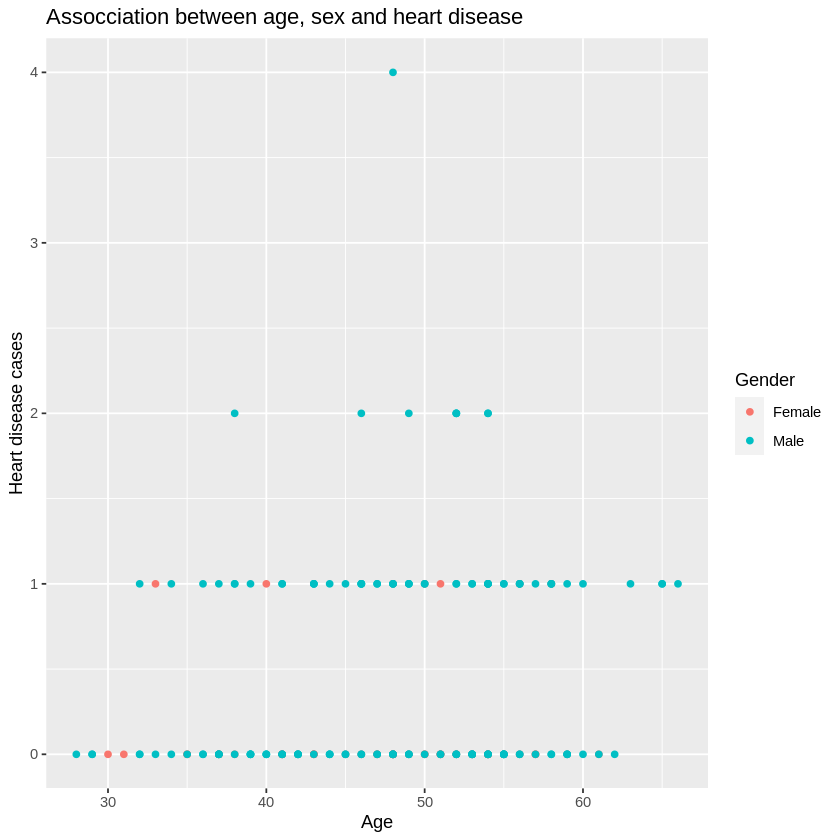

In [147]:
# your code here
heart_disease_plot <- hd_train |>
    ggplot(aes(x = age, y = heart_disease_cases, color = sex)) + 
        geom_point() +
        labs(x = "Age", y = "Heart disease cases", color = "Gender", title = "Assocciation between age, sex and heart disease")

heart_disease_plot

### Methods:
We will begin our data analysis starting with cleaning, followed by wrangling of the data set we have chosen to determine an answer to our question. We aim to find our answer by utilizing scatterplots for the predictors we have chosen for the scope of this project. We will likely be utilizing other graphs including line and bar graphs for this project. Forementioned, we have chosen eight of the fourteen attributes of the data set: age (Moran, 2014), sex (Maas, 2013), resting blood pressure (He, et al, 2022), resting electrocardiographic results (Ashley, 2001), fasting blood sugar (Park, 2013), chest pain, and heart disease. Studies support that our chosen predictors have associations with cardiovascular heart disease but the extent of each is still unknown.


### Expected Outcomes and Significance:

#### What do we expect to find: 
We expect to find an association between heart problems like chest pain and heart disease with other variables such as age, sex, resting blood pressure, resting electrocardiographs, and fasting blood pressure. Based on our findings we will be able to identify the variable that associates most with heart disease as well as the relationship they have with one another. We are certain that heart disease risk and diagnosis increase with age and resting blood pressure, but the same could not be said for the other predictors like sex and fasting blood sugar.

#### What impact do such findings have:
The data we observe from this project will allow us to identify portions of the population at higher risk for heart disease based on the predictor variables we test. Hence, allowing for prevention through testing and contributing to the current body of knowledge we have on heart disease.

#### What future questions could this lead to: 
Our project leads to many future questions: How can we prevent it within the population, especially if the community doesn't necessarily have the resources for prevention? Also, what other variables other than the ones we have tested could lead to being predisposed heart disease? Lastly, how much control do patients have over their risk for heart disease and how can they prevent heart disease with this information?
